In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay


In [215]:
#Read csv data
data_train = pd.read_csv('../data_preparation/subset_train_expanded.csv', index_col=0)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0


In [216]:
#define function for classifying type based on Load
def type_new(row):
    if row['Type'] == 'L':
        val = '1'
    elif row['Type'] == 'M':
        val = '2'
    else:
        val = '3'
    return val

In [217]:
#create new column 'Good' using the function above
data_train['Type_Num'] = data_train.apply(type_new, axis=1)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0,2
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0,1
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0,1
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0,1
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0,1


In [218]:
data_test = pd.read_csv('../data_preparation/subset_test_expanded.csv', index_col=0)
data_test['Type_Num'] = data_test.apply(type_new, axis=1)
data_test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
7600,L54779,L,300.5,311.0,1759,28.3,13,0,0,0,0,0,0,1
3665,M18524,M,302.3,311.7,1685,30.8,130,0,0,0,0,0,0,2
6718,M21577,M,301.4,310.6,1464,48.6,96,0,0,0,0,0,0,2
1077,L48256,L,296.9,307.7,1653,35.9,177,0,0,0,0,0,0,1
3130,L50309,L,300.1,309.6,1642,34.5,53,0,0,0,0,0,0,1


In [219]:
data_valid = pd.read_csv('../data_preparation/subset_valid_expanded.csv', index_col=0)
data_valid['Type_Num'] = data_valid.apply(type_new, axis=1)
data_valid.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1071,M15930,M,296.9,307.8,1477,37.2,160,0,0,0,0,0,0,2
1877,L49056,L,298.3,308.0,1242,62.0,98,0,0,0,0,0,0,1
2328,M17187,M,299.3,308.7,1420,50.3,208,0,0,0,0,0,0,2
6863,M21722,M,301.1,311.2,1384,49.4,48,0,0,0,0,0,0,2
945,M15804,M,295.7,306.3,1712,28.5,43,0,0,0,0,0,0,2


In [220]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']

In [221]:
from sklearn.neighbors import KNeighborsClassifier
X_train = data_train[label]
y_train = data_train['Machine failure']

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)

0.9826916024935827

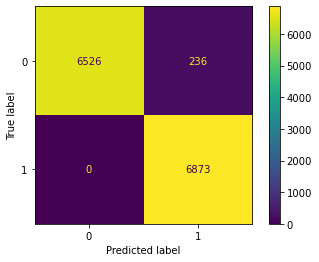

In [222]:
cm_val = confusion_matrix(data_train['Machine failure'], neigh.predict(data_train[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [223]:
#Compute the (weighted) graph of k-Neighbors for points in X.
A = neigh.kneighbors_graph(X_train)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [224]:
neigh.score(data_test[label], data_test['Machine failure'])

0.7480798771121352

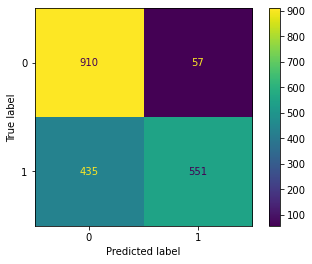

In [225]:
cm_val = confusion_matrix(data_test['Machine failure'], neigh.predict(data_test[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [226]:
neigh.score(data_valid[label], data_valid['Machine failure'])

0.6882684426229508

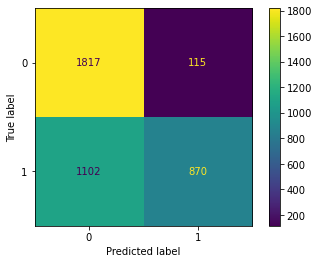

In [227]:
cm_val = confusion_matrix(data_valid['Machine failure'], neigh.predict(data_valid[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

## Decision tree

In [228]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(data_train[label])

y_test = clf.predict(data_test[label])

y_valid = clf.predict(data_valid[label])

<BarContainer object of 6 artists>

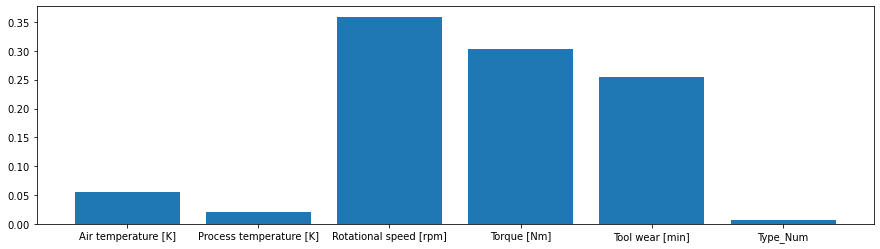

In [229]:
imp = np.vstack((label, clf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf.feature_importances_)

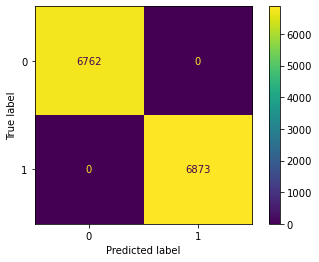

In [230]:
cm_val = confusion_matrix(data_train['Machine failure'], y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [231]:
print(classification_report(data_train['Machine failure'], y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6873

    accuracy                           1.00     13635
   macro avg       1.00      1.00      1.00     13635
weighted avg       1.00      1.00      1.00     13635



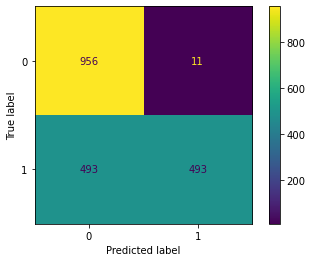

In [232]:
cm_val = confusion_matrix(data_test['Machine failure'], y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [233]:
print(classification_report(data_test['Machine failure'], y_test))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       967
           1       0.98      0.50      0.66       986

    accuracy                           0.74      1953
   macro avg       0.82      0.74      0.73      1953
weighted avg       0.82      0.74      0.73      1953



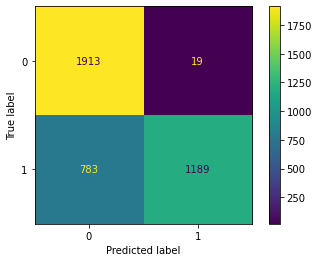

In [234]:
cm_val=confusion_matrix(data_valid['Machine failure'], y_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [235]:
print(classification_report(data_valid['Machine failure'], y_valid))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      1932
           1       0.98      0.60      0.75      1972

    accuracy                           0.79      3904
   macro avg       0.85      0.80      0.79      3904
weighted avg       0.85      0.79      0.79      3904



In [236]:
#tree.plot_tree(clf)

In [237]:
data_t = data_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',\
                     'Torque [Nm]', 'Tool wear [min]', 'Type_Num','Machine failure']]

In [238]:
#graph = graphviz.Source(dot_data)
#graph.render("data_t") 

In [239]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=label, class_names='Machine Failure', filled=True, rounded=True,  special_characters=True)

In [240]:
import graphviz 
graph = graphviz.Source(dot_data) 

In [241]:
import pylab
graph.render(filename='tree')
pylab.savefig('tree.png')

<Figure size 432x288 with 0 Axes>

In [242]:
import graphviz as gv
import pylab

g1 = gv.Graph(format='png')

g1.node('A')
g1.node('B')
g1.edge('A', 'B')

g1.view()
print(g1.source) 

filename = g1.render(filename='img/g1')

pylab.savefig('filename.png')

graph {
	A
	B
	A -- B
}


<Figure size 432x288 with 0 Axes>

In [243]:
clf.get_depth()

19

In [244]:
#Post pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

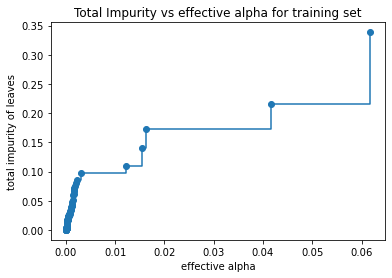

In [245]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [246]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16129184201175412


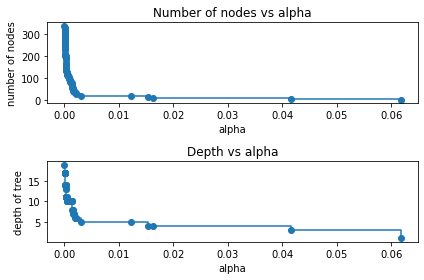

In [247]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

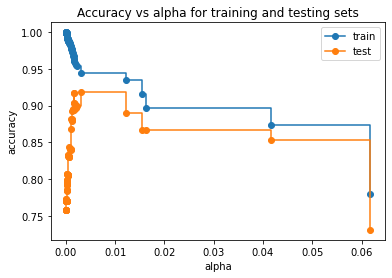

In [248]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(data_test[label], data_test['Machine failure']) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [249]:
EPS = 0.0
np.arange(EPS, 1, 0.025)

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975])

https://towardsdatascience.com/pre-pruning-or-post-pruning-1dbc8be5cb14

# Tree Depth = 3

In [250]:
clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.0)
clf_p = clf_p.fit(X_train, y_train)

y_test = clf_p.predict(data_test[label])

y_valid = clf_p.predict(data_valid[label])

In [251]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(data_test['Machine failure'], y_test)

array([[827, 140],
       [174, 812]], dtype=int64)

In [252]:
print(classification_report(data_test['Machine failure'], y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       967
           1       0.85      0.82      0.84       986

    accuracy                           0.84      1953
   macro avg       0.84      0.84      0.84      1953
weighted avg       0.84      0.84      0.84      1953



In [253]:
confusion_matrix(data_valid['Machine failure'], y_valid)

array([[1697,  235],
       [ 290, 1682]], dtype=int64)

In [254]:
print(classification_report(data_test['Machine failure'], y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       967
           1       0.85      0.82      0.84       986

    accuracy                           0.84      1953
   macro avg       0.84      0.84      0.84      1953
weighted avg       0.84      0.84      0.84      1953



[Text(167.4, 190.26, 'X[2] <= 1386.5\ngini = 0.5\nsamples = 13635\nvalue = [6762, 6873]'),
 Text(83.7, 135.9, 'X[0] <= 301.55\ngini = 0.267\nsamples = 5651\nvalue = [895, 4756]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 52.45\ngini = 0.42\nsamples = 2485\nvalue = [745, 1740]'),
 Text(20.925, 27.180000000000007, 'gini = 0.39\nsamples = 547\nvalue = [402, 145]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.291\nsamples = 1938\nvalue = [343, 1595]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 1383.5\ngini = 0.09\nsamples = 3166\nvalue = [150, 3016]'),
 Text(104.625, 27.180000000000007, 'gini = 0.083\nsamples = 3153\nvalue = [137, 3016]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 14.75\ngini = 0.39\nsamples = 7984\nvalue = [5867, 2117]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 2.5\ngini = 0.035\nsamples = 679\nvalue = [12, 667]'),
 Text(188.32500000000002, 27.180000000000007, 'gini 

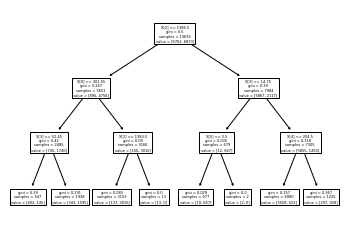

In [255]:
tree.plot_tree(clf_p)

In [256]:
dot_data = tree.export_graphviz(clf_p, out_file=None, feature_names=label, class_names='Machine Failure', filled=True,\
                                rounded=True,  special_characters=True)

In [257]:
graph = graphviz.Source(dot_data) 

In [258]:
graph
graph.render(filename='tree_d3')
pylab.savefig('tree_d3.png')

<Figure size 432x288 with 0 Axes>

In [259]:
clf_p.get_depth()

3

## Random Forest

In [260]:
y_train.dtype

dtype('int64')

In [261]:
y_train1 = np.array(y_train).reshape(-1, 1)
y_train1

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = data_train[label]
y_train = data_train['Machine failure']

X_test = data_test[label]
y_test = data_test['Machine failure']

X_valid = data_valid[label]
y_valid = data_valid['Machine failure']

clf_rf = RandomForestClassifier(max_depth=3, random_state=0)
scale1 = scaler.fit_transform(X_train)
y_train1 = np.array(y_train).reshape(-1, 1)
scale2 = scaler.fit_transform(y_train1)
clf_rf.fit(scale1, scale2)
clf_rf.score(scale1, scale2)

<ipython-input-262-ab0692d5081a>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(scale1, scale2)


ValueError: Unknown label type: 'continuous'

In [ ]:
scale

In [263]:
cm_val = confusion_matrix(data_train['Machine failure'], clf_rf.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [264]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']

In [265]:
imp = np.vstack((label, clf_rf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf_rf.feature_importances_)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [267]:
clf_rf.score(X_test, y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
cm_val = confusion_matrix(data_test['Machine failure'], clf_rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [ ]:
clf_rf.score(X_valid, y_valid)

In [ ]:
cm_val = confusion_matrix(data_valid['Machine failure'], clf_rf.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, min_samples_split=2, \
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, \
                                oob_score=False, n_jobs=None, random_state=0, verbose=0,\
                                warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train)

In [ ]:
clf_rf.decision_path(X_train)

## Gradient Boosted Tree

In [268]:
from sklearn.ensemble import GradientBoostingClassifier

In [269]:
X_train = data_train[label]
y_train = data_train['Machine failure']

X_test = data_test[label]
y_test = data_test['Machine failure']


X_valid = data_valid[label]
y_valid = data_valid['Machine failure']

In [270]:
clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,\
                                 max_depth=3, random_state=0).fit(X_train, y_train)
clf_xg.score(X_train, y_train)

0.9997799779977998

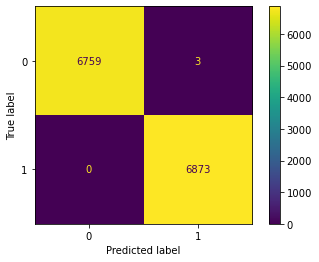

In [271]:
cm_val = confusion_matrix(data_train['Machine failure'], clf_xg.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [272]:
clf_xg.score(X_test, y_test)

0.8136200716845878

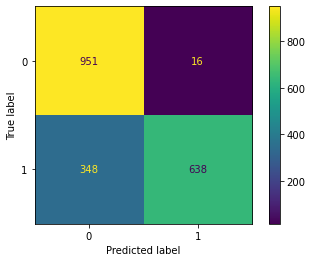

In [273]:
cm_val = confusion_matrix(data_test['Machine failure'], clf_xg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [274]:
clf_xg.score(X_valid, y_valid)

0.7932889344262295

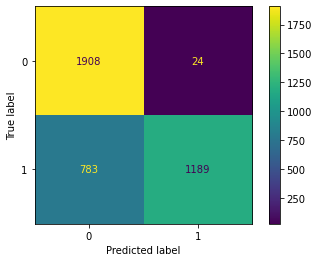

In [275]:
cm_val = confusion_matrix(data_valid['Machine failure'], clf_xg.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

Illustration of the effect of different regularization strategies for Gradient Boosting. The example is taken from Hastie et al 2009 1.

The loss function used is binomial deviance. Regularization via shrinkage (learning_rate < 1.0) improves performance considerably. In combination with shrinkage, stochastic gradient boosting (subsample < 1.0) can produce more accurate models by reducing the variance via bagging. Subsampling without shrinkage usually does poorly. Another strategy to reduce the variance is by subsampling the features analogous to the random splits in Random Forests (via the max_features parameter).

1    T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.


In [276]:
from sklearn import ensemble
from sklearn import datasets

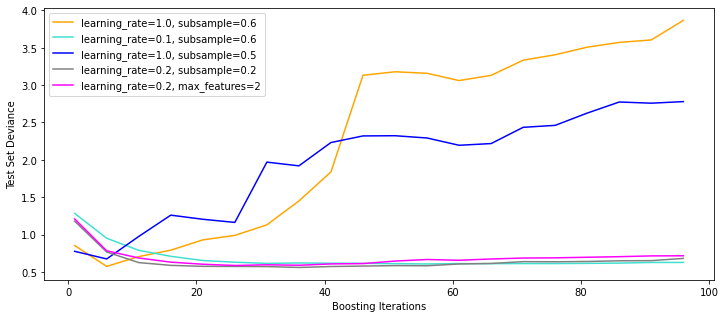

In [277]:
original_params = {
    "n_estimators": 100,
    "max_depth": 3,
    "random_state": 0,
}

plt.figure(figsize =(12, 5))

for label, color, setting in [
    ("learning_rate=1.0, subsample=0.6", "orange", {"learning_rate": 1.0, "subsample": 0.6}),
    ("learning_rate=0.1, subsample=0.6", "turquoise", {"learning_rate": 0.1, "subsample": 0.6}),
    ("learning_rate=1.0, subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.2",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper left")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

In [278]:
clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, subsample=0.5,\
                                 max_depth=3, random_state=0).fit(X_train, y_train)
clf_xg.score(X_train, y_train)

0.9870920425375871

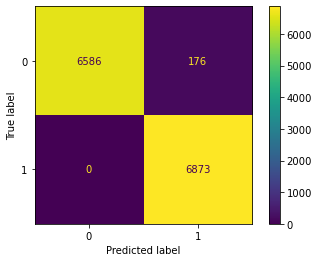

In [279]:
cm_val = confusion_matrix(data_train['Machine failure'], clf_xg.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [280]:
clf_xg.score(X_test, y_test)

0.9170506912442397

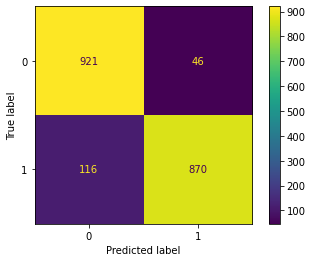

In [281]:
cm_val = confusion_matrix(data_test['Machine failure'], clf_xg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [282]:
clf_xg.score(X_valid, y_valid)

0.8939549180327869

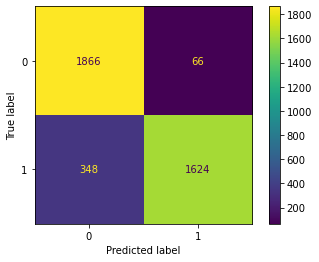

In [283]:
cm_val = confusion_matrix(data_valid['Machine failure'], clf_xg.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [284]:
import sklearn

In [285]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.
